# 美国劳动力收入调查 


* 资料来自Github
* 取70%为训练集所需数据，30%为测试集所需数据
* 将年薪5万美金作为判断依据，分析年薪5万以上及以下的劳动者都有什么特征

导入库与所需工具

In [1]:
import pandas as pd                 # 导入基础包pandas
import matplotlib.pyplot as plt      # 数据可视化包
from sklearn.model_selection import train_test_split  #训练集以及测试集所需的包

%matplotlib inline

载入数据

In [2]:
df = pd.read_csv("adult.csv")

df.shape #统计表的行与列数

(32561, 14)

数据的预处理
* 取头尾10列数据浏览
* 检查空值

In [3]:
df.head(10) #取头10行数据

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.tail(10) #取末尾10行数据

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
32551,32,Private,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.isnull().values.any() #检查表中的空值

False

数据处理
* 抛开不必要的影响因素
* 将字符串类型的数据转换为数字或数组型

In [6]:
del df['education']
del df['capital-gain']
del df['capital-loss']
del df['native-country']
del df['occupation']

In [7]:
sex_map = {' Male' : 1, ' Female' : 0}  
#性别相关，1为男性，0为女性
df['sex'] = df['sex'].map(sex_map) 

s = ' White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black'  
#表中的人种参照，分别有“白种人、亚洲人种、美洲人种、黑色人种、其他人种”
race_map = {' White': 0, ' Asian-Pac-Islander': 1, ' Amer-Indian-Eskimo': 2, ' Other': 3, ' Black': 4}
df['race'] = df['race'].map(race_map)

money_map = {' <=50K': 0, ' >50K': 1}
#根据薪资分类，低收入人群：0，高收入人群：1
df['money'] = df['money'].map(money_map)

rel_map = {' Wife': 0, ' Own-child': 1, ' Husband': 2, ' Not-in-family': 3, ' Other-relative': 4, ' Unmarried': 5}
#家庭结构分析，嫁人为妇为0、已婚已孕为1、成家立业为2、独生为3、有其他亲属为4、未婚为5
df['relationship'] = df['relationship'].map(rel_map)

mar_map = {' Married-civ-spouse': 0, ' Divorced': 1, ' Never-married': 2, ' Separated': 3, ' Widowed': 4, ' Married-spouse-absent': 5, ' Married-AF-spouse': 6}
#婚恋情况分析：已婚为0，、离婚为1、未婚为2、离异为3、丧偶为3、丧偶式婚姻为4，再婚为6
df['marital-status'] = df['marital-status'].map(mar_map)

work_map = {' Private': 0, ' Self-emp-not-inc': 1, ' Self-emp-inc': 2, ' Federal-gov': 3, ' Local-gov': 4, ' State-gov': 5, ' Without-pay': 6, ' Never-worked': 7, ' ?': 8}
#就业状况：个体户为0、无限责任公司为1、有限责任公司为2、联邦政府工作人员为3、地方政府工作人员为4、州政府工作人员为5、失业为6、无工作经验者为7、其他归类为8
df['workclass'] = df['workclass'].map(work_map)

进行可视化分析：红色的关联度最高，蓝色反之。

In [8]:
#可视化图像的预备
def plot_corr(df, size=10):

    corr = df.corr()    #数据帧相关函数
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   #颜色代码矩形的相关值
    plt.xticks(range(len(corr.columns)), corr.columns)  # x轴
    plt.yticks(range(len(corr.columns)), corr.columns)  # y轴


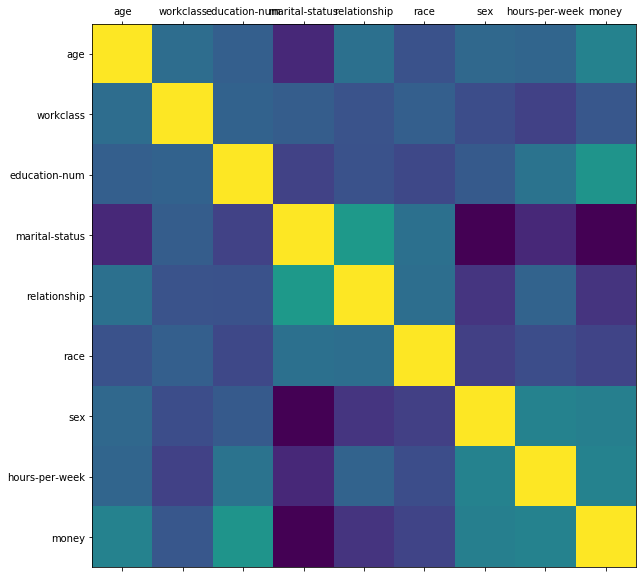

In [9]:
plot_corr(df)  #根据上一段代码输出可视化的图形

In [10]:
df.corr() #以图表显示各项数据的相关性，数值越大则关联性越强

,age,workclass,education-num,marital-status,relationship,race,sex,hours-per-week,money
age,1.000000,0.114059,0.036527,-0.220938,0.128919,-0.029869,0.088832,0.068756,0.234037
workclass,0.114059,1.000000,0.051581,0.025886,-0.026602,0.037281,-0.053619,-0.112513,-0.004868
education-num,0.036527,0.051581,1.000000,-0.107648,-0.031898,-0.078799,0.012280,0.148123,0.335154
marital-status,-0.220938,0.025886,-0.107648,1.000000,0.362819,0.131782,-0.380043,-0.221882,-0.377794
relationship,0.128919,-0.026602,-0.031898,0.362819,1.000000,0.120530,-0.169737,0.056941,-0.171771
race,-0.029869,0.037281,-0.078799,0.131782,0.120530,1.000000,-0.117363,-0.054443,-0.096839
sex,0.088832,-0.053619,0.012280,-0.380043,-0.169737,-0.117363,1.000000,0.229309,0.215980
hours-per-week,0.068756,-0.112513,0.148123,-0.221882,0.056941,-0.054443,0.229309,1.000000,0.229689
money,0.234037,-0.004868,0.335154,-0.377794,-0.171771,-0.096839,0.215980,0.229689,1.000000


开始分配训练集以及测试集，并对预测结果的准确性进行分析
* 70%做训练集，剩余30%做测试集

In [11]:
#特征列命名
feature_col_names = ['age', 'workclass', 'education-num', 'marital-status', 'relationship', 'race', 'sex', 'hours-per-week']
#特征类命名
predicted_class_names = ['money']

X = df[feature_col_names].values      #预测特征列
y = df[predicted_class_names].values  #预测特征类

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

* 运用各种方法，对数据进行分析，输出其准确度

方法1：高斯朴素贝叶斯

In [12]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB() #默认priors=None
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

对训练集以及测试集拟合度进行检测

In [13]:
from sklearn import metrics #导入数据包

nb_predict_train = nb_model.predict(X_train) #训练集
nb_predict_test = nb_model.predict(X_test) #测试集

# 训练集与测试集精确度输出
print("训练集精确度: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print("测试集精确度: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

训练集精确度: 0.7585
测试集精确度: 0.7639


矩阵分析优劣

In [14]:
print("混淆矩阵：")
# 记标签1为左上的正确值，0为右下的的谬误值
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))

print("分类报告：")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))

混淆矩阵：
[[1682  632]
 [1674 5781]]
分类报告：
              precision    recall  f1-score   support

           1       0.50      0.73      0.59      2314
           0       0.90      0.78      0.83      7455

    accuracy                           0.76      9769
   macro avg       0.70      0.75      0.71      9769
weighted avg       0.81      0.76      0.78      9769



方法2：One-Hot编码

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 按顺序调用 fit 和 transform (使用方法链接)
X_scaled = scaler.fit(X_train).transform(X_train)
# 同样的结果，但计算效率更高
X_scaled_d = scaler.fit_transform(X_train)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression() # 利用LogisticRegression建立线性模型
logreg.fit(X_train, y_train.ravel())
print("训练集精确度: {:.4f}".format(logreg.score(X_train, y_train)))
print("测试集精确度: {:.4f}".format(logreg.score(X_test, y_test)))

训练集精确度: 0.8219
测试集精确度: 0.8186


G:\SOFTERWAREINSTALL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


方法3：随机森林

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

训练集与测试集预测

In [18]:
rf_predict_train = rf_model.predict(X_train)  #训练集
rf_predict_test = rf_model.predict(X_test)  #测试集

# 训练集与测试集的精确度输出
print("训练集精确度: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("测试集精确度: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

训练集精确度: 0.9363
测试集精确度: 0.8097


矩阵输出分析结果

In [19]:
print("混淆矩阵：")
print(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0]) )

print("分类报告：")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

混淆矩阵：
[[1070  912]
 [ 637 5522]]
分类报告：
              precision    recall  f1-score   support

           1       0.63      0.54      0.58      1982
           0       0.86      0.90      0.88      6159

    accuracy                           0.81      8141
   macro avg       0.74      0.72      0.73      8141
weighted avg       0.80      0.81      0.80      8141



方法4：linearSVC

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
svc_model = LinearSVC().fit(X_train, y_train.ravel())

G:\SOFTERWAREINSTALL\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
svc_predict_train = svc_model.predict(X_train)  #训练集
svc_predict_test = svc_model.predict(X_test)  #测试集

# 训练集与测试集精确度输出
print("训练集精确度: {0:.4f}".format(metrics.accuracy_score(y_train, svc_predict_train)))
print("测试集精确度: {0:.4f}".format(metrics.accuracy_score(y_test, svc_predict_test)))

训练集精确度: 0.8170
测试集精确度: 0.8143


In [22]:
print("混淆矩阵：")
print(metrics.confusion_matrix(y_test, svc_predict_test, labels=[1, 0]) )

print("分类报告：")
print(metrics.classification_report(y_test, svc_predict_test, labels=[1,0]))

混淆矩阵：
[[ 857 1125]
 [ 387 5772]]
分类报告：
              precision    recall  f1-score   support

           1       0.69      0.43      0.53      1982
           0       0.84      0.94      0.88      6159

    accuracy                           0.81      8141
   macro avg       0.76      0.68      0.71      8141
weighted avg       0.80      0.81      0.80      8141



方法5：决策树

In [23]:
import sys
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("第一次测试训练集精确度: {:.4f}".format(tree.score(X_train, y_train)))
print("第一次测试预测集精确度: {:.4f}".format(tree.score(X_test, y_test)))

第一次测试训练集精确度: 0.9364
第一次测试预测集精确度: 0.7849


限制树深度

In [24]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)

print("训练集精确度: {:.4f}".format(tree.score(X_train, y_train)))
print("测试集精确度: {:.4f}".format(tree.score(X_test, y_test)))

训练集精确度: 0.8324
测试集精确度: 0.8293


方法5：带交叉验证的网格搜索

带交叉验证的网格搜索会搜索最佳参数，还会利用得到最佳交叉验证性能的参数在 整个训练数据集上自动拟合一个新模型，但缺点是训练所有这些模型所需的时间长

In [25]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), random_state=0)

best_score = 0

In [26]:
for gamma in [0.001, 0.01, 10]:
    for C in [0.001, 0.01, 10]:
        #对于每种数据参数组合都训练一个SVC
        svm = SVC(gamma=gamma, C=C)
        #执行交叉验证
        scores = cross_val_score(svm, X_train, y_train, cv=3)
        #计算交叉验证的平均精度
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
#重新构建一个模型
svm = SVC(**best_parameters)
svm.fit(X_train, y_train)
test_score = svm.score(X_test, y_test)
print("最佳验证结果: {:.4f}".format(best_score))
print("最佳参数: ", best_parameters)
print("测试集最佳准确度: {:.4f}".format(test_score))

最佳验证结果: 0.8231
最佳参数:  {'C': 10, 'gamma': 0.01}
测试集最佳准确度: 0.8214


In [27]:
svm_predict_test = svm.predict(X_test)

print("混淆矩阵")
print(metrics.confusion_matrix(y_test, svm_predict_test, labels=[1, 0]))

print("分类报告")
print(metrics.classification_report(y_test, svm_predict_test, labels=[1,0]))

混淆矩阵
[[1005  977]
 [ 477 5682]]
分类报告
              precision    recall  f1-score   support

           1       0.68      0.51      0.58      1982
           0       0.85      0.92      0.89      6159

    accuracy                           0.82      8141
   macro avg       0.77      0.71      0.73      8141
weighted avg       0.81      0.82      0.81      8141



方法6：神经网络（深度学习）

神经网络是用于分类和回归的多层感知器。它的主要优点之一是能够获 取大量数据中包含的信息，并构建无比复杂的模型。

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(),stratify=y,random_state=42)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("训练集准确度: {:.4f}".format(mlp.score(X_train, y_train)))
print("测试集准确度: {:.4f}".format(mlp.score(X_test, y_test)))

训练集准确度: 0.8315
测试集准确度: 0.8311


神经网络要求所有输入特征的变化范围相似，最理想的情况是均值为0、方差为1。我们必须对数据进行缩放以满足这些要求

In [29]:
# 计算训练集中每个特征的平均值 
mean_on_train = X_train.mean(axis=0) 
# 计算训练集中每个特征的标准差 
std_on_train = X_train.std(axis=0) 
 
# 减去平均值，然后乘以标准差的倒数  
# 如此运算之后，mean=0，std=1 
X_train_scaled = (X_train - mean_on_train) / std_on_train 
# 对测试集做相同的变换（使用训练集的平均值和标准差） 
X_test_scaled = (X_test - mean_on_train) / std_on_train 
 
mlp = MLPClassifier(max_iter=1000, alpha=0.1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("训练集准确度: {:.4f}".format( 
    mlp.score(X_train_scaled, y_train)))  
print("测试集准确度: {:.4f}".format(mlp.score(X_test_scaled, y_test)))

训练集准确度: 0.8348
测试集准确度: 0.8321


In [30]:
mlp_predict_test = mlp.predict(X_test)

print("混淆矩阵")
print(metrics.confusion_matrix(y_test, mlp_predict_test, labels=[1, 0]))

print("分类报告")
print(metrics.classification_report(y_test, mlp_predict_test, labels=[1,0]))

混淆矩阵
[[ 126 1834]
 [1035 5146]]
分类报告
              precision    recall  f1-score   support

           1       0.11      0.06      0.08      1960
           0       0.74      0.83      0.78      6181

    accuracy                           0.65      8141
   macro avg       0.42      0.45      0.43      8141
weighted avg       0.59      0.65      0.61      8141

